<a href="https://colab.research.google.com/github/Niktain-america/Project-Portfolio/blob/main/Layoffs_Tweets_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Layoffs Tweets Sentiment Analysis using Python:

Import necessary libraries:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

In [2]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/tweets.csv")
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source
0,BestCompaniesAZ,Arizona,We validate and elevate the best companies to ...,2009-01-11 16:28:33+00:00,2836.0,2469.0,870,False,2022-12-20 18:00:48+00:00,Apply today!:\nhttps://t.co/eCRVPFByiy\n\n#app...,"['apply', 'hiring', 'opentowork', 'techlayoffs...",Hootsuite Inc.
1,BestCompaniesAZ,Arizona,We validate and elevate the best companies to ...,2009-01-11 16:28:33+00:00,2835.0,2469.0,870,False,2022-12-20 18:00:48+00:00,Apply today!:\nhttps://t.co/eCRVPFByiy\n\n#app...,"['apply', 'hiring', 'opentowork', 'techlayoffs...",Hootsuite Inc.
2,CHILUDO,NaN,AMC APE MAKING APE MOVES,2022-03-27 17:10:55+00:00,19.0,32.0,4,False,2022-12-18 00:21:03+00:00,I want to wish all @Twitter employees that got...,NaN,Twitter Web App
3,ANIL,"New Delhi, India, From Bihar.",New Delhi. Above politicos. An economist and I...,2010-04-17 16:58:14+00:00,81.0,287.0,4484,False,2022-12-17 14:04:44+00:00,@elonmusk sir has call me to work from office....,['TwitterLayoffs'],Twitter for Android
4,🇺🇸 My Head’s Exploding 🤯,leswarden@mastodon.world 👈,"A Proud Believer in Democracy, Our Constitutio...",2009-01-28 01:03:18+00:00,1044.0,777.0,3742,False,2022-12-16 19:47:58+00:00,Here’s what happens when you fire all your eng...,['TickTok'],Twitter for iPhone


Let’s have a quick look at all the column names of the dataset:

In [3]:
data.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source'],
      dtype='object')

We only need three columns for this task (user_name, user_verified, and text); I will only select these columns and move forward:

In [4]:
data=data[["user_name","user_verified","text"]]

Let’s have a look at whether any of these columns contains any null values or not:

In [5]:
data.isnull().sum()

user_name        2
user_verified    1
text             1
dtype: int64

Let's remove the null values:

In [6]:
data = data.dropna(how='any',axis=0) 

Let's again check the null values:

In [7]:
data.isnull().sum()

user_name        0
user_verified    0
text             0
dtype: int64

In [8]:
data["text"].value_counts()

#TwitterLayoffs 50% of its 7,500 employees will be let go today..\n\nEmployees have started to receive the emails..\n\nIn some cases, entire teams are sacked..                                                                                                                                    7
Feeling stuck with your assignments?.\nclass kicking my ass ?.\npay assignment\npay essay\nLaw\nresearch\npay term paper\nMaths\nHomework\nChas\nMidterms\nExam\nChemistry\nPsychology\nBiology\nMECHANICAL ENGENEERING.\n+1(803)599-8211.\n#TwitterLayoffs.                                       6
Feeling stuck with your assignments?.\nclass kicking my ass ?.\npay assignment\npay essay\nLaw\nresearch\npay term paper\nOprah\nMaths\n@Unitedk42347450\nHomework\nChas\nMidterms\nExam\nChemistry\nPsychology\nBiology\nMECHANICAL ENGENEERING.\n+1(803)599-8211.\n#TwitterLayoffs.              6
Feeling stuck with your assignments?.\nclass kicking my ass ?.\npay assignment\npay essay\nLaw\nresearch\npay term paper\

Let's prepare this data for the task of sentiment analysis. Here i will remove all the links, punctuation, symbols and other language errors from the tweets:

In [9]:
nltk.download('stopwords')
stemmer=nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
def clean(text):
  text=str(text).lower()
  text=re.sub('\[.*?\]', '', text)
  text=re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)
  text = [word for word in text.split(' ') if word not in stopword]
  text=" ".join(text)
  text = [stemmer.stem(word) for word in text.split(' ')]
  text=" ".join(text)
  return text
data["text"] = data["text"].apply(clean)

Now let’s have a look at the wordcloud of the tweets, which will show the most frequently used words in the tweets by people sharing their feelings and updates about the Layoff:

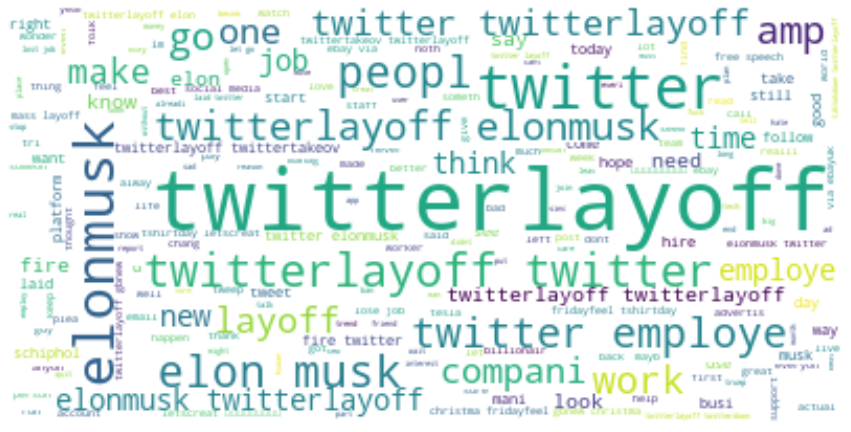

In [11]:
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now. we will add three more columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the tweets:

In [13]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["text"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["text"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["text"]]
data = data[["text", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                text  Positive  Negative  \
0  appli todayappli hire opentowork techlayoff tw...     0.000     0.000   
1  appli todayappli hire opentowork techlayoff tw...     0.000     0.000   
2  want wish twitter employe got fire happi holid...     0.346     0.090   
3  elonmusk sir call work offic think resign twit...     0.000     0.255   
4  here happen fire engin resort run thing tickto...     0.000     0.211   

   Neutral  
0    1.000  
1    1.000  
2    0.564  
3    0.745  
4    0.789  


Let's have look at the most frequent words used by people with positive sentiments:

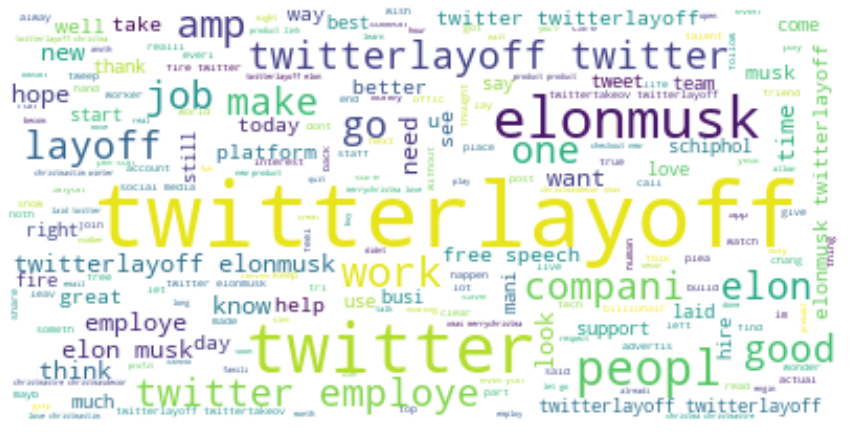

In [14]:
positive =' '.join([i for i in data['text'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Let's have look at the most frequent words used by people with negative sentiments:

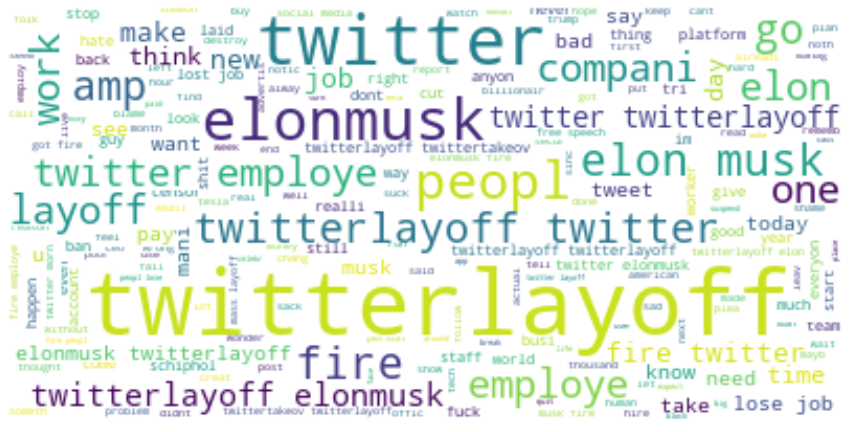

In [15]:
negative =' '.join([i for i in data['text'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()